In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing as mp
from particle_creation import *
from mass_asign import *
from grav_potential import *
from acceleration import *

In [ ]:
ng = 16
num_par = 30

pars_pos = (np.random.rand(num_par, 2)*ng).astype(np.float32)
pars_vel = (np.random.rand(num_par, 2)).astype(np.float32)
# pars_mass = np.random.rand(num_par).astype(np.float32)*100
pars_mass = np.ones_like(pars_pos[:,0]).astype(np.float32)

# pars_pos = np.array([[8.1,11.1],[8.1,10.1]]).astype(np.float32)
# pars_vel = np.array([[10,0],[0,0]]).astype(np.float32)
# # pars_mass = np.ones_like(pars_pos[:,0]).astype(np.float32)
# pars_mass = np.array((0.00001,1)).astype(np.float32)

# pars_df = pd.DataFrame({'pos_y': pars_pos[:,0], 'pos_x': pars_pos[:,1],
#                         'vel_y': pars_vel[:,0], 'vel_x': pars_vel[:,1],
#                         'mass': pars_mass})
pars_df = pd.DataFrame({'pos_x': pars_pos[:,0], 'pos_y': pars_pos[:,1],
                        'vel_x': pars_vel[:,0], 'vel_y': pars_vel[:,1],
                        'mass': pars_mass,'id':np.arange(len(pars_pos))})
par_list = par_create_2d(pars_df)
pars_df.head()

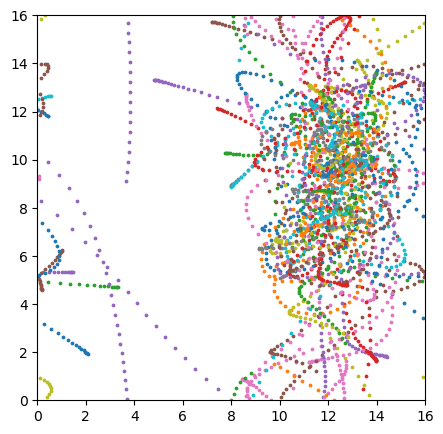

In [13]:
dt = 0.01
# Define a colormap
# cmap = plt.cm.get_cmap('viridis', 10) 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_ylim(0, ng)
ax.set_xlim(0, ng)
for step in range(100):
     
    for par in par_list:
        # Fitrst step:
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.periodic(ng)
        
    dens = cic_density_2d(pars=par_list, ng=ng, h=1) ## Update density field
    phi = grav_phi_2d(dens,h=1)    ## Update gravity field
    cic_acc_2d(pars=par_list, phi=phi, h=1)  ## Update acceleration
    # Second step:
    for par in par_list:
        par.vel += par.acc * dt
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.periodic(ng)
    # Plot
    
    for par in par_list:
        # color = cmap(par.id % 10) 
        im = ax.scatter(par.pos[0], par.pos[1], s=3)
# Set the colorbar
# norm = plt.Normalize(0, 9)  # Normalize the colormap to the range [0, 9]
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Particle ID')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax in axes.flatten():
    ax.set_xlim(0, ng)
    ax.set_ylim(0, ng)
im1 = axes[0].pcolormesh(acc_x)
cb1 = plt.colorbar(im1)
im2 = axes[1].pcolormesh(acc_x1)
cb2 = plt.colorbar(im2)